# Natural Language Processing
El procesamiento del lenguaje natural (NLP) es una rama de la inteligencia artificial que permite a las máquinas entender, interpretar y manipular el lenguaje humano. En esta notebook, nos enfocaremos en el análisis de sentimientos, una aplicación común de NLP que busca determinar la polaridad emocional de un texto. Utilizaremos el dataset de IMDb, que contiene reseñas de películas etiquetadas como positivas o negativas.

# Caso Análisis de Sentimientos

## Herramientas de Procesamiento de Lenguaje Natural y Análisis de Texto

### NLTK (Natural Language Toolkit)
NLTK es una biblioteca líder para la programación en Python de procesos del lenguaje humano. Proporciona interfaces fáciles de usar a más de 50 recursos léxicos corporales y léxicos, como WordNet, junto con una suite de bibliotecas de procesamiento de texto para la clasificación, tokenización, stemming, etiquetado, análisis sintáctico y razonamiento semántico. Es adecuado tanto para investigadores académicos como para desarrolladores industriales.

### Gensim
Gensim es una biblioteca de Python para modelado de temas y procesamiento de lenguaje natural, específicamente diseñada para descubrir la estructura semántica de documentos analizando las relaciones estadísticas entre palabras. Permite al usuario manejar grandes colecciones de texto utilizando algoritmos de espacio vectorial como LDA y similaridades de documentos. Es muy eficiente y escalable, y se utiliza comúnmente en la industria y la academia para tareas de modelado de temas y similitudes de documentos.

### BeautifulSoup
BeautifulSoup es una biblioteca que facilita raspar información de páginas web, permitiendo el parseo de documentos HTML y XML. Se utiliza comúnmente para tareas de web scraping debido a su capacidad para transformar documentos HTML complejos en un árbol de objetos Python comprensible y navegable. Esto permite a los usuarios acceder a elementos específicos del documento de forma rápida y extraer datos de manera eficiente.

Estas herramientas son fundamentales en el campo del procesamiento del lenguaje natural y el análisis de texto, proporcionando capacidades que abarcan desde la preparación y limpieza de texto hasta el análisis avanzado y modelado de temas.


## IMDB Dataset

### Descripción General
El dataset de IMDB contiene reseñas de películas extraídas de la base de datos de películas en Internet (IMDB). Es ampliamente utilizado en el campo del procesamiento del lenguaje natural para tareas de análisis de sentimientos. Este conjunto de datos es particularmente útil para entrenar y evaluar modelos de clasificación de texto que determinan si una reseña es positiva o negativa.

### Características del Dataset
- **Número de Reseñas**: Generalmente, el dataset incluye 50,000 reseñas de películas, divididas equitativamente en dos conjuntos: entrenamiento y prueba.
- **Etiquetado Binario**: Cada reseña ha sido etiquetada como positiva o negativa. En muchas versiones del dataset, las reseñas con una calificación de 7 o superior se consideran positivas, mientras que las que tienen una calificación de 4 o inferior son negativas.
- **Equilibrio de Clases**: El dataset está balanceado, con cantidades iguales de reseñas positivas y negativas, lo cual es ideal para el entrenamiento de modelos de clasificación.

### Usos Comunes
Este dataset se utiliza para entrenar modelos de análisis de sentimientos, donde el objetivo es comprender y clasificar las opiniones expresadas en las reseñas de películas. Los modelos pueden incluir desde simples clasificadores lineales hasta complejas redes neuronales recurrentes o modelos basados en transformadores.

### Importancia Académica y Comercial
El análisis de sentimientos de reseñas de películas tiene aplicaciones importantes tanto en el ámbito académico como en el comercial. Permite a las empresas entender mejor las opiniones de los clientes y adaptar sus estrategias de marketing y desarrollo de productos. En la investigación, proporciona un medio para desarrollar y probar algoritmos avanzados de procesamiento de lenguaje natural.

### Desafíos Asociados
El principal desafío al trabajar con este dataset incluye manejar el lenguaje informal de las reseñas, así como las sutilezas y la ironía que pueden ser difíciles de interpretar para los modelos de aprendizaje automático. Además, el contexto cultural y los elementos subjetivos de las películas pueden influir en la percepción de los sentimientos en el texto.

Este dataset de IMDB es, por lo tanto, una herramienta invaluable para el desarrollo y la mejora de sistemas de procesamiento de lenguaje natural y análisis de sentimientos, ofreciendo a los investigadores y desarrolladores una rica fuente de datos textuales reales y etiquetados para experimentación.

# Preparación del entorno

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Configuración visual para los gráficos
sns.set(style="whitegrid")

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Carga de datos

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
import os
from google.colab import drive

# Verificar si Google Drive ya está montado
if not os.path.ismount('/content/drive'):
    # Montar Google Drive
    drive.mount('/content/drive')
else:
    print("Google Drive ya está montado.")

# Definir la ruta a tu directorio de trabajo
work_dir = '/content/drive/My Drive/Colab Notebooks/M1000IA - 2024'

# Verificar si el directorio existe
if os.path.exists(work_dir):
    # Cambiar al directorio de trabajo
    os.chdir(work_dir)
    print(f"Directorio cambiado a: {work_dir}")

    # Listar los archivos en el directorio de trabajo
    print("Contenido del directorio:")
    !ls
else:
    print(f"El directorio {work_dir} no existe. Verifica la ruta.")



Mounted at /content/drive
Directorio cambiado a: /content/drive/My Drive/Colab Notebooks/M1000IA - 2024
Contenido del directorio:
'=0.21.0'					'Natural Language Processing  - Proceso.ipynb'
'Introducción a Python con Google Colab.ipynb'	 results
 Natural_Language_Processing_BERT.ipynb		 ryanair_reviews.csv


In [7]:
import os
import pandas as pd

# Check the current working directory
print(f"Current working directory: {os.getcwd()}")

# List the contents of the current directory
print("Directory contents:")
!ls

# Specify the full path to the file
file_path = "/content/drive/MyDrive/Colab Notebooks/M1000IA - 2024/ryanair_reviews.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
print(df)

df

Current working directory: /content/drive/My Drive/Colab Notebooks/M1000IA - 2024
Directory contents:
'=0.21.0'					'Natural Language Processing  - Proceso.ipynb'
'Introducción a Python con Google Colab.ipynb'	 results
 Natural_Language_Processing_BERT.ipynb		 ryanair_reviews.csv
      Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-04-29             1.0          Portugal   
1              1     2024-04-25             1.0            France   
2              2     2024-04-22             1.0            France   
3              3     2024-04-08             1.0            Jordan   
4              4     2024-04-08             1.0       Switzerland   
...          ...            ...             ...               ...   
2257        2257     2012-08-28             2.0    United Kingdom   
2258        2258     2012-08-28             1.0    United Kingdom   
2259        2259     2012-08-28             1.0    United Kingdom   
2260        2260     2012-08

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,0,2024-04-29,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,...,April 2024,1.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-04-25,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,...,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
2,2,2024-04-22,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,...,February 2024,3.0,3.0,no,3.0,3.0,NaN,NaN,NaN,NaN
3,3,2024-04-08,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),...,April 2024,1.0,1.0,no,2.0,1.0,NaN,NaN,NaN,NaN
4,4,2024-04-08,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,...,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2257,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2258,2258,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,3.0,2.0,NaN,0.0,NaN,NaN
2259,2259,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2260,2260,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,Economy Class,NaN,...,NaN,NaN,2.0,no,1.0,1.0,NaN,1.0,NaN,NaN


In [8]:
import pandas as pd

# Asegúrate de usar la ruta correcta a tu archivo
file_path = '/content/drive/MyDrive/Colab Notebooks/M1000IA - 2024/ryanair_reviews.csv'

df = pd.read_csv(file_path)


In [ ]:
df

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,0,2024-04-29,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,...,April 2024,1.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-04-25,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,...,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
2,2,2024-04-22,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,...,February 2024,3.0,3.0,no,3.0,3.0,NaN,NaN,NaN,NaN
3,3,2024-04-08,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),...,April 2024,1.0,1.0,no,2.0,1.0,NaN,NaN,NaN,NaN
4,4,2024-04-08,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,...,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2257,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2258,2258,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,3.0,2.0,NaN,0.0,NaN,NaN
2259,2259,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2260,2260,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,Economy Class,NaN,...,NaN,NaN,2.0,no,1.0,1.0,NaN,1.0,NaN,NaN


In [ ]:
# # Importar pandas para el manejo de datos
# import pandas as pd

# # URL del dataset de IMDb en formato CSV
# url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

# # Descargar y descomprimir el archivo directamente
# import tarfile
# from urllib.request import urlopen

# # Función para descargar y extraer el dataset
# def download_and_extract_dataset(url):
#     response = urlopen(url)
#     with tarfile.open(fileobj=response, mode="r:gz") as tar:
#         tar.extractall(path='.')

# # Llamada a la función de descarga y extracción
# download_and_extract_dataset(url)

# # Cargar los datos en DataFrames de pandas
# # Suponiendo que los datos están en formato texto dentro de directorios separados
# import os

# def load_imdb_dataset(path='aclImdb'):
#     train_texts = []
#     train_labels = []
#     test_texts = []
#     test_labels = []

#     for dataset_type in ['train', 'test']:
#         for sentiment in ['pos', 'neg']:
#             directory = f"{path}/{dataset_type}/{sentiment}"
#             for filename in os.listdir(directory):
#                 if filename.endswith('.txt'):
#                     with open(os.path.join(directory, filename), encoding='utf-8') as file:
#                         if dataset_type == 'train':
#                             train_texts.append(file.read())
#                             train_labels.append(1 if sentiment == 'pos' else 0)
#                         else:
#                             test_texts.append(file.read())
#                             test_labels.append(1 if sentiment == 'pos' else 0)

#     return pd.DataFrame({'review': train_texts, 'label': train_labels}), pd.DataFrame({'review': test_texts, 'label': test_labels})

# # Cargar los datasets
# train_df, test_df = df()

# # Visualización de las primeras filas del dataset de entrenamiento
# train_df.head()

In [ ]:
df

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,0,2024-04-29,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,...,April 2024,1.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-04-25,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,...,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
2,2,2024-04-22,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,...,February 2024,3.0,3.0,no,3.0,3.0,NaN,NaN,NaN,NaN
3,3,2024-04-08,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),...,April 2024,1.0,1.0,no,2.0,1.0,NaN,NaN,NaN,NaN
4,4,2024-04-08,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,...,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2257,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2258,2258,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,3.0,2.0,NaN,0.0,NaN,NaN
2259,2259,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,Economy Class,NaN,...,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2260,2260,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,Economy Class,NaN,...,NaN,NaN,2.0,no,1.0,1.0,NaN,1.0,NaN,NaN


# Análisis Exploratorio de Datos (EDA)


El análisis exploratorio de datos nos permite entender mejor la naturaleza de los datos con los que estamos trabajando. Exploraremos la distribución de las reseñas positivas y negativas y visualizaremos las palabras más comunes en cada tipo de reseña.



In [ ]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en conjuntos de entrenamiento (80%) y prueba (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Verificar el tamaño de los DataFrames resultantes
print(f'Tamaño del conjunto de entrenamiento: {train_df.shape}')
print(f'Tamaño del conjunto de prueba: {test_df.shape}')

# Resetear el índice de los DataFrames si es necesario
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Verificar algunas filas del conjunto de entrenamiento
print(train_df.head())

# Verificar algunas filas del conjunto de prueba
print(test_df.head())

Tamaño del conjunto de entrenamiento: (1809, 21)
Tamaño del conjunto de prueba: (453, 21)
   Unnamed: 0 Date Published  Overall Rating Passenger Country  Trip_verified  \
0         610     2019-08-20             1.0    United Kingdom   Not Verified   
1        1892     2014-07-31             4.0    United Kingdom            NaN   
2         427     2020-01-21            10.0    United Kingdom   Not Verified   
3         374     2020-04-30             1.0           Belgium   Not Verified   
4         105     2023-05-08             1.0           Austria  Trip Verified   

                    Comment title  \
0            "No value for money"   
1         Ryanair customer review   
2  "nothing was too much trouble"   
3      "try to give me a voucher"   
4  "staff was really unfriendly"    

                                             Comment Type Of Traveller  \
0  London to Athens with Ryanair. Terrible custom...      Solo Leisure   
1  High expectations? No. From the outside the pl...

In [ ]:
df['Overall Rating'].value_counts()

Overall Rating
1.0     865
10.0    263
8.0     198
2.0     184
9.0     177
7.0     123
3.0     103
5.0      84
6.0      77
4.0      57
Name: count, dtype: int64

Overall Rating
1.0     865
10.0    263
8.0     198
2.0     184
9.0     177
7.0     123
3.0     103
5.0      84
6.0      77
4.0      57
Name: count, dtype: int64


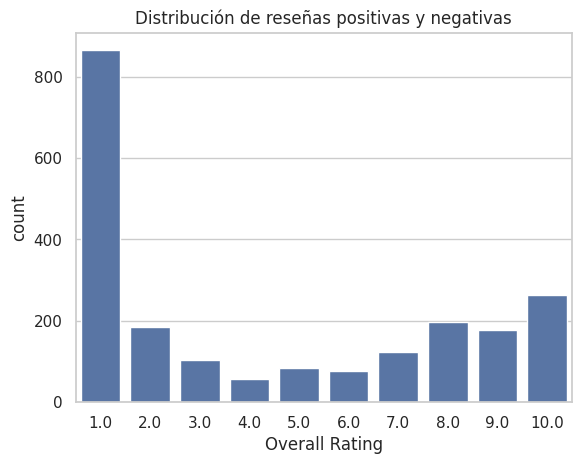

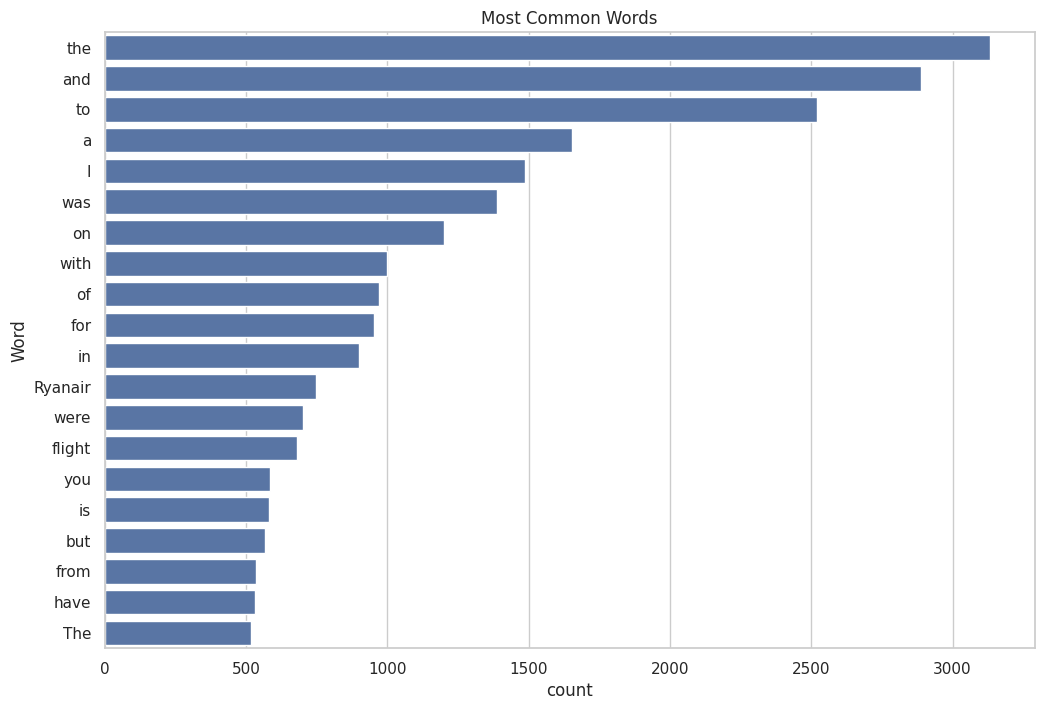

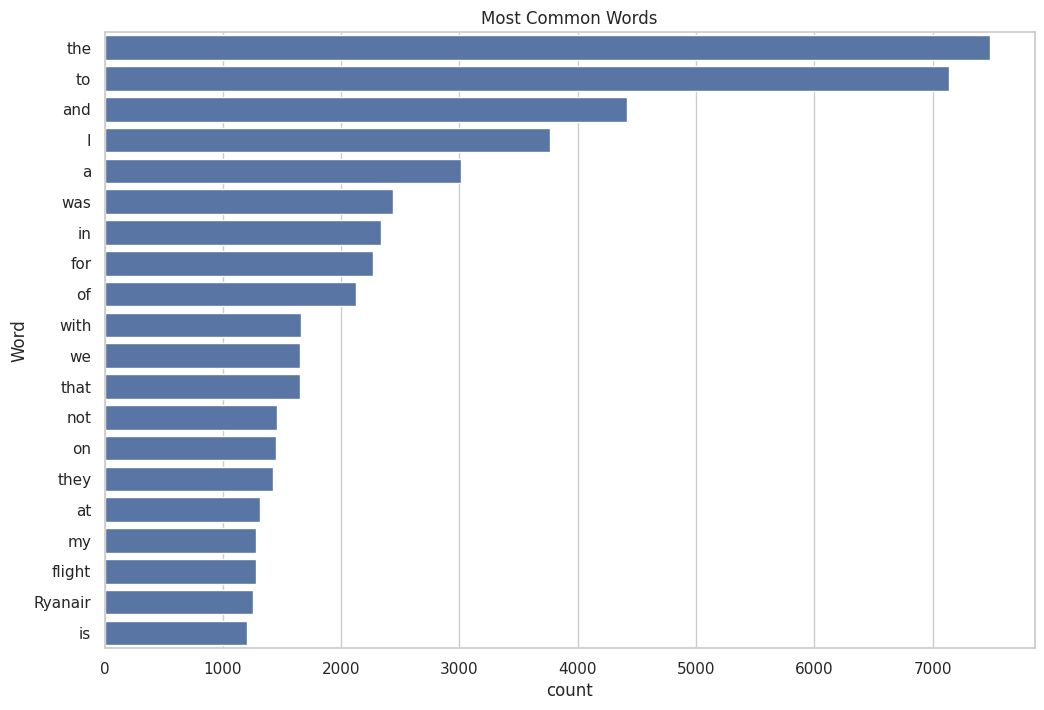

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de valores para ver el balance de clases
print(df['Overall Rating'].value_counts())

# Gráfico de barras para mostrar la distribución de reseñas positivas y negativas
sns.countplot(x='Overall Rating', data=df)
plt.title('Distribución de reseñas positivas y negativas')
plt.show()

# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()  # Asegúrate de que 'text' no está vacío
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)  # Selecciona las n palabras más frecuentes
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['Overall Rating'] >= 7]['Comment']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['Overall Rating'] <= 4]['Comment']
plot_most_common_words(negative_reviews)

# VOLVER A EJECUTAR LUEGO DEL TEXT CLEANING


#  **Feature Engineering**



# Preprocesamiento de Texto


El preprocesamiento es un paso crucial en cualquier tarea de procesamiento de lenguaje natural. Prepararemos el texto para el análisis eliminando elementos innecesarios y normalizando el contenido.

In [11]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Descargar wordnet

nltk.download('wordnet')

# Descargar las stopwords de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Función para limpiar el texto
def clean_text(text):
    # Eliminar las etiquetas HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    # Eliminar caracteres no alfabéticos
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convertir el texto a minúsculas
    text = text.lower()
    # Tokenizar el texto
    words = word_tokenize(text)
    # Eliminar stopwords y palabras vacías
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.strip()]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)


# Aplicar la función de limpieza al DataFrame
train_df['clean_review'] = train_df['Comment'].apply(clean_text)
test_df['clean_review'] = test_df['Comment'].apply(clean_text)

# Mostrar las transformaciones
train_df[['Comment', 'clean_review']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-11-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-11-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,Comment,clean_review
0,London to Athens with Ryanair. Terrible custom...,london athens ryanair terrible customer servic...
1,High expectations? No. From the outside the pl...,high expectation outside plane look modern ful...
2,I flew EDI/AGP on 13/01/2020. I really don't u...,flew edi agp really understand people leave ne...
3,I'm still waiting for my refund cause my fligh...,still waiting refund cause flight canceled due...
4,We arrived at the airport in good time to chec...,arrived airport good time check one bag stood ...


El problema podría estar en cómo se están limpiando los textos. La función word_tokenize de NLTK separa el texto en tokens, y la lista de tokens resultante se utiliza para filtrar las palabras vacías (stopwords) y realizar la lematización. Sin embargo, puede ser que después de eliminar los caracteres no alfabéticos, algunas palabras se conviertan en tokens vacíos, lo que puede estar causando problemas con la tokenización final.

Una solución sería agregar una condición para asegurarse de que solo se agreguen palabras válidas después de la tokenización y la eliminación de stopwords.
Esta versión de la función clean_text primero tokeniza el texto después de la eliminación de caracteres no alfabéticos. Luego, filtra las palabras vacías y solo agrega palabras válidas a la lista filtered_words. Esto debería ayudar a evitar que se agreguen tokens vacíos al texto limpio, lo que podría estar causando el problema de la tokenización incorrecta.

## Word Clouds


Una "nube de palabras" visualiza las palabras más frecuentes de un texto, con el tamaño de cada palabra proporcional a su frecuencia. Este tipo de visualización es útil para obtener una impresión rápida de los temas más discutidos en el dataset.

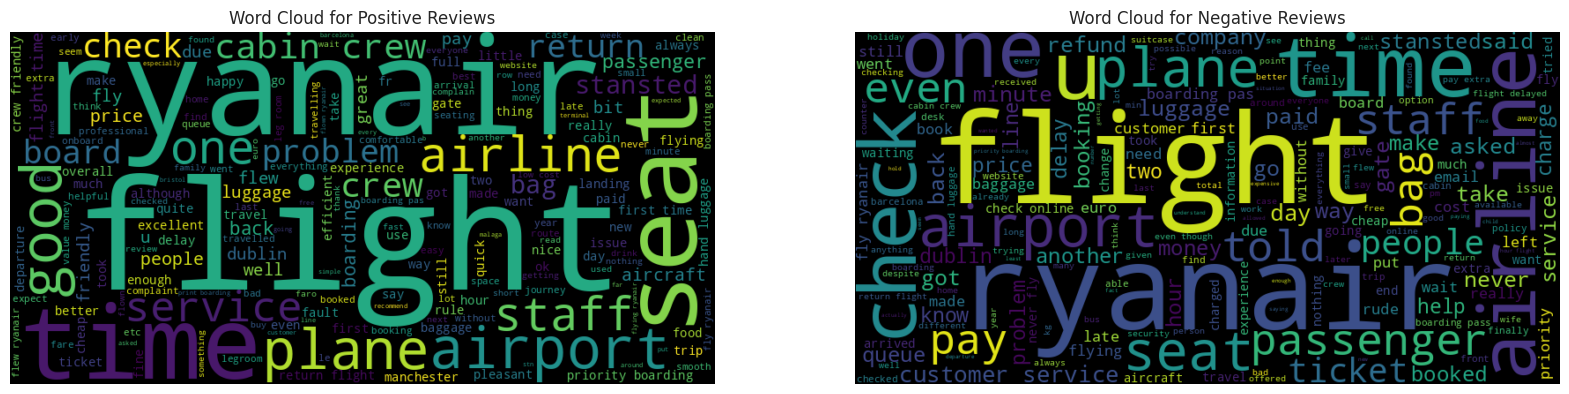

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar una word cloud para las reseñas positivas
positive_text = ' '.join(train_df[train_df['Overall Rating'] >= 7]['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_text)

# Generar una word cloud para las reseñas negativas
negative_text = ' '.join(train_df[train_df['Overall Rating'] <= 4]['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_text)

# Visualización
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

##  Visualización de palabras más comunes en reseñas positivas y negativas
Graficos de barra aplicados nuevamente luego de utilizar stopwords.

Overall Rating
1.0     865
10.0    263
8.0     198
2.0     184
9.0     177
7.0     123
3.0     103
5.0      84
6.0      77
4.0      57
Name: count, dtype: int64


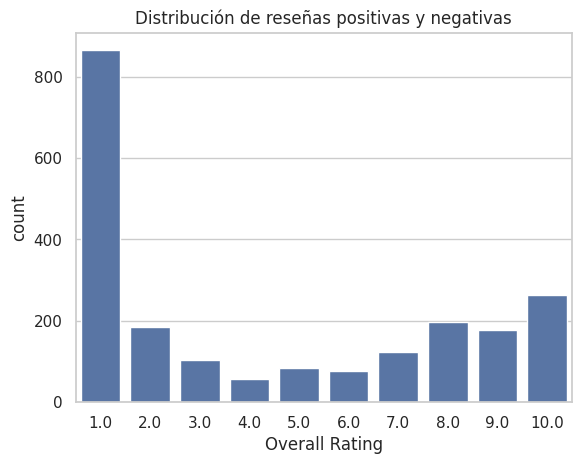

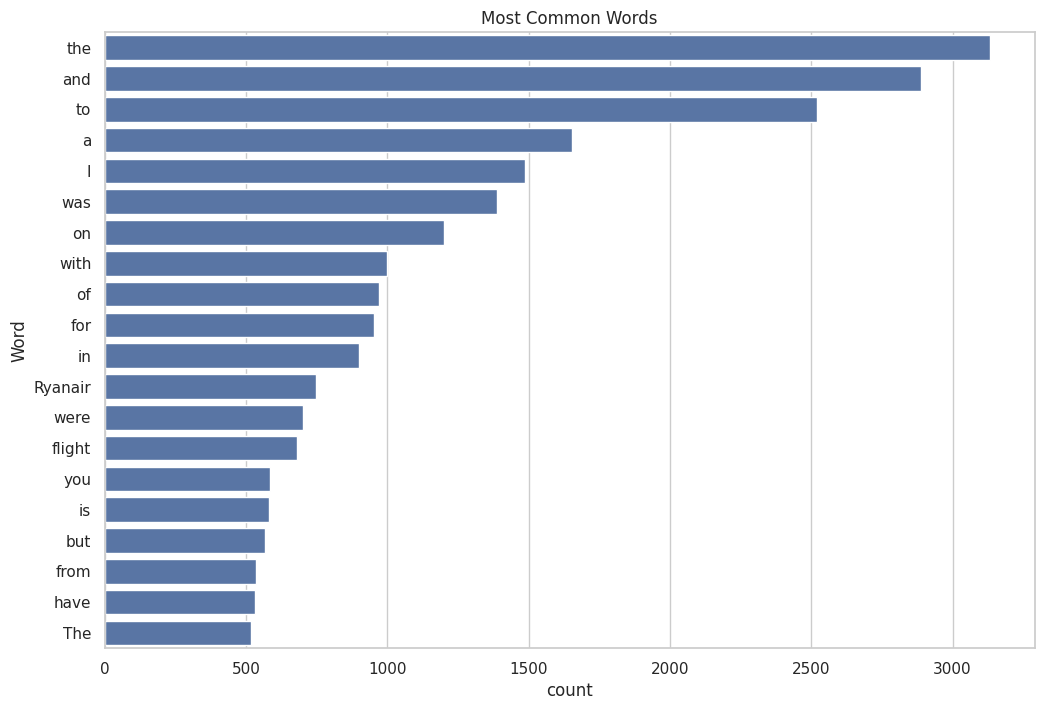

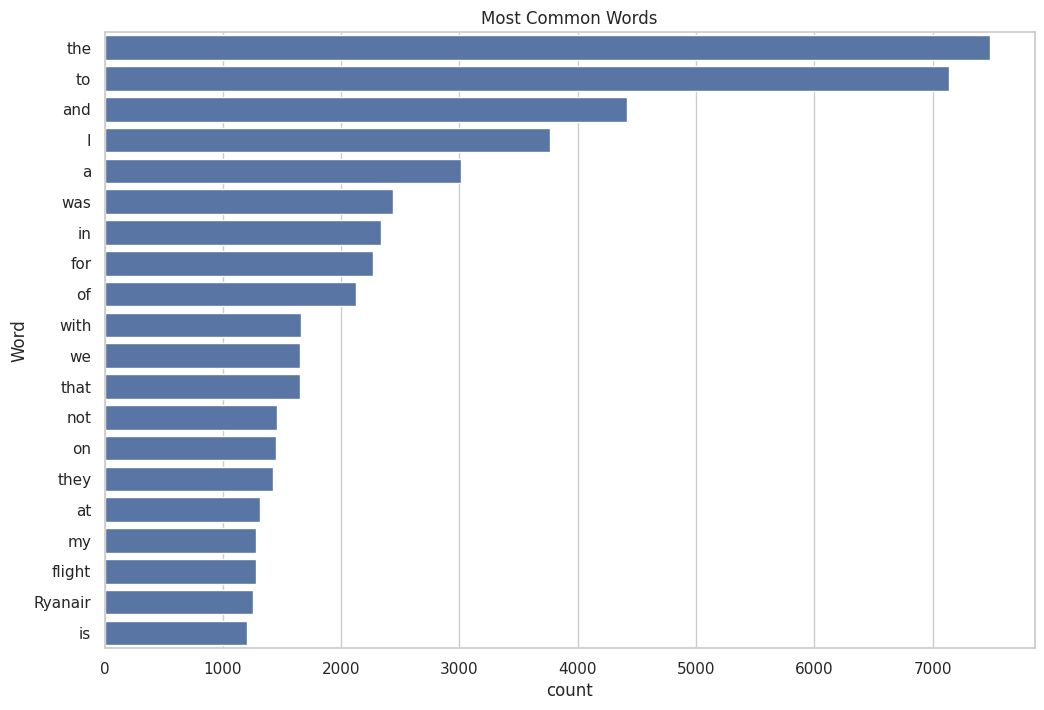

In [12]:
# Conteo de valores para ver el balance de clases
print(df['Overall Rating'].value_counts())

# Gráfico de barras para mostrar la distribución de reseñas positivas y negativas
sns.countplot(x='Overall Rating', data=df)
plt.title('Distribución de reseñas positivas y negativas')
plt.show()

# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()  # Asegúrate de que 'text' no está vacío
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)  # Selecciona las n palabras más frecuentes
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['Overall Rating'] >= 7]['Comment']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['Overall Rating'] <= 4]['Comment']
plot_most_common_words(negative_reviews)

# Extracción de Características: vectorización


Convertiremos el texto limpio en formatos numéricos que los modelos de machine learning pueden procesar utilizando diferentes técnicas de vectorización.

### Comparativa de Métodos de Extracción de Características
- **Bag of Words**: Crea un vocabulario de todas las palabras únicas en el dataset y usa la frecuencia de las palabras como características. Es simple pero efectiva para muchos problemas de NLP.
- **TF-IDF**: Similar a BoW pero ajusta las frecuencias según la importancia de las palabras en los documentos. Es útil para resaltar palabras que son más relevantes en un contexto específico.

Ambas técnicas tienen sus ventajas y son ampliamente utilizadas en tareas de NLP. La elección entre ellas depende del contexto específico y de los objetivos del análisis.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow_train = vectorizer_bow.fit_transform(train_df['clean_review'])
X_bow_test = vectorizer_bow.transform(test_df['clean_review'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf_train = vectorizer_tfidf.fit_transform(train_df['clean_review'])
X_tfidf_test = vectorizer_tfidf.transform(test_df['clean_review'])

# Comparación de características extraídas
print("Número de características en BoW:", X_bow_train.shape[1])
print("Número de características en TF-IDF:", X_tfidf_train.shape[1])

Número de características en BoW: 7562
Número de características en TF-IDF: 7562


## Visualización de características para cada review - BoW

In [ ]:
import pandas as pd

# Obteniendo nombres de las características (palabras) para BoW
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Convertir una fila de la matriz BoW a DataFrame para una visualización más fácil
def bow_to_df(row_index):
    row = X_bow_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_bow, 'Frequency': row})
    return df[df['Frequency'] > 0]  # Filtrar por frecuencias mayores a cero

# Visualizar la conversión BoW de una revisión específica
example_bow = bow_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_df['clean_review'][0])
example_bow

london athens ryanair terrible customer service paid airport check airline staff member slow rude value money whatsoever appalling usually flying heathrow first last time using horrendous airline avoid


,Word,Frequency
209,airline,2
212,airport,1
368,appalling,1
494,athens,1
554,avoid,1
1145,check,1
1682,customer,1
2674,first,1
2724,flying,1
3141,heathrow,1


## Visualización de características para cada review - TFIDF

In [ ]:
# Obteniendo nombres de las características (palabras) para TF-IDF
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# Convertir una fila de la matriz TF-IDF a DataFrame para una visualización más fácil
def tfidf_to_df(row_index):
    row = X_tfidf_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_tfidf, 'TF-IDF Value': row})
    return df[df['TF-IDF Value'] > 0]  # Filtrar por valores TF-IDF mayores a cero

# Visualizar la conversión TF-IDF de una revisión específica
example_tfidf = tfidf_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_df['clean_review'][0])
example_tfidf

london athens ryanair terrible customer service paid airport check airline staff member slow rude value money whatsoever appalling usually flying heathrow first last time using horrendous airline avoid


,Word,TF-IDF Value
209,airline,0.208706
212,airport,0.111532
368,appalling,0.262227
494,athens,0.221087
554,avoid,0.196642
1145,check,0.111999
1682,customer,0.131686
2674,first,0.140577
2724,flying,0.149564
3141,heathrow,0.314461


## Visualización de distribución de palabras - BoW

<ipython-input-18-9de5655e76d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')


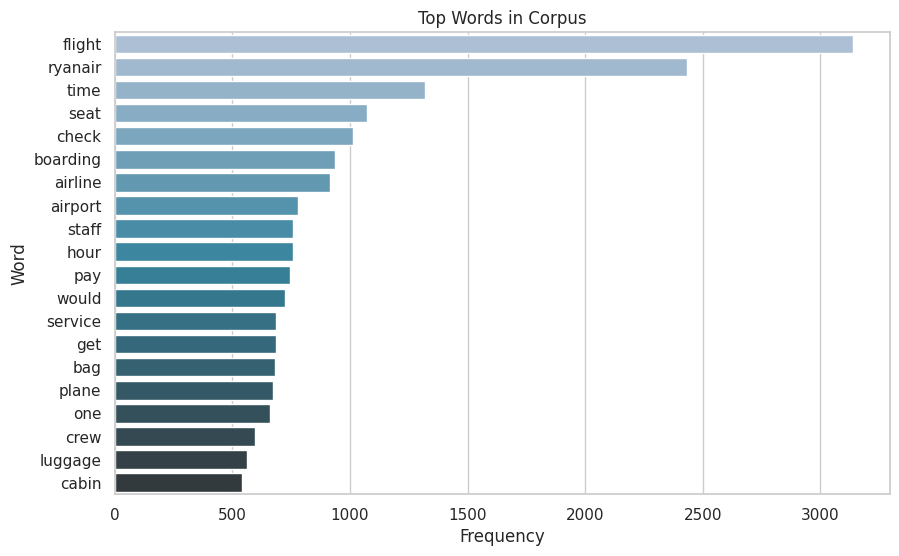

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_bow_train)

## Visualización de distribución de palabras - TF-IDF

<ipython-input-19-dcddfe386503>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')


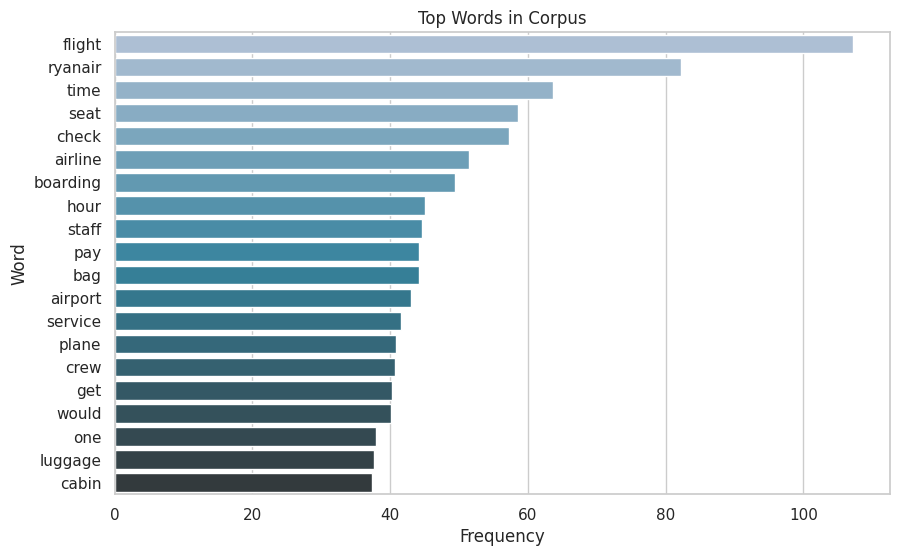

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_tfidf_train)

## Entrenamiento de modelo de regresión logística basado en BoW

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

131
Overall Rating
1.0     865
10.0    263
8.0     198
2.0     184
9.0     177
7.0     123
3.0     103
5.0      84
6.0      77
4.0      57
Name: count, dtype: int64


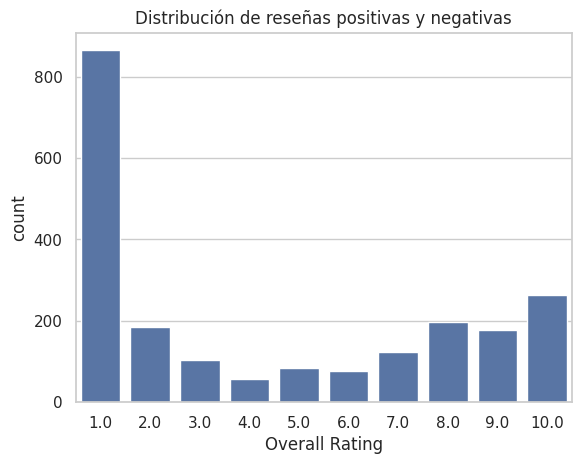

              precision    recall  f1-score   support

         1.0       0.75      0.83      0.79       170
         2.0       0.23      0.12      0.15        43
         3.0       0.11      0.05      0.07        20
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00        13
         6.0       0.30      0.14      0.19        22
         7.0       0.08      0.10      0.09        21
         8.0       0.29      0.27      0.28        41
         9.0       0.23      0.28      0.25        32
        10.0       0.43      0.61      0.50        56

    accuracy                           0.48       427
   macro avg       0.24      0.24      0.23       427
weighted avg       0.45      0.48      0.46       427



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Verificar valores nulos
print(df['Overall Rating'].isnull().sum())

# Eliminar registros con valores nulos en 'Overall Rating'
df = df.dropna(subset=['Overall Rating'])

# Conteo de valores para ver el balance de clases
print(df['Overall Rating'].value_counts())

# Gráfico de barras para mostrar la distribución de reseñas positivas y negativas
sns.countplot(x='Overall Rating', data=df)
plt.title('Distribución de reseñas positivas y negativas')
plt.show()

# División del dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Transformación de textos en matrices de características (BoW)
vectorizer = CountVectorizer()
X_bow_train = vectorizer.fit_transform(train_df['Comment'])
X_bow_test = vectorizer.transform(test_df['Comment'])

# Alternativamente, puedes usar TF-IDF
# vectorizer = TfidfVectorizer()
# X_tfidf_train = vectorizer.fit_transform(train_df['Comment'])
# X_tfidf_test = vectorizer.transform(test_df['Comment'])

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_bow_train, train_df['Overall Rating'])

# Evaluación del modelo
predictions = model.predict(X_bow_test)
print(classification_report(test_df['Overall Rating'], predictions))

## Entrenamiento de modelo de regresión logística basado en TFIDF

In [ ]:
#Alternativamente, puedes usar TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(train_df['Comment'])
X_tfidf_test = vectorizer.transform(test_df['Comment'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_tfidf_train, train_df['Overall Rating'])  # Asumiendo que 'label' es la etiqueta de sentimiento

# Evaluación del modelo
predictions = model.predict(X_tfidf_test)
print(classification_report(test_df['Overall Rating'], predictions))

              precision    recall  f1-score   support

         1.0       0.58      0.99      0.73       170
         2.0       0.00      0.00      0.00        43
         3.0       0.00      0.00      0.00        20
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00        21
         8.0       0.33      0.24      0.28        41
         9.0       0.27      0.19      0.22        32
        10.0       0.42      0.59      0.49        56

    accuracy                           0.51       427
   macro avg       0.16      0.20      0.17       427
weighted avg       0.34      0.51      0.40       427



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Word Embeddings

Los embeddings de palabras son representaciones vectoriales densas que capturan relaciones semánticas entre palabras. Exploraremos dos enfoques populares: GloVe y Word2Vec

### Modelo de embeddings preentrenado



GloVe es un modelo de embeddings de palabras que se desarrolló como una alternativa a las técnicas tradicionales de modelado de palabras como Word2Vec. Fue introducido por investigadores de la Universidad de Stanford en un intento de combinar lo mejor de dos mundos en el campo de los embeddings de palabras: los métodos basados en la matriz de co-ocurrencia y los métodos predictivos.

Los embeddings preentrenados de GloVe están disponibles públicamente y pueden ser cargados fácilmente usando bibliotecas como `gensim` o directamente en frameworks de deep learning como TensorFlow y PyTorch. Estos modelos están entrenados en varios corpus y están disponibles en múltiples dimensiones, lo que permite a los investigadores y desarrolladores elegir el que mejor se adapte a sus necesidades específicas.


In [ ]:
import numpy as np

# Preprocesar datos y crear la columna 'clean_review' (esto faltaba)
def preprocess_data(df):
    # Aplicar la función de limpieza al DataFrame
    df['clean_review'] = df['Comment'].apply(clean_text)
    return df

from gensim.downloader import load

# Descargar embeddings preentrenados de GloVe
glove_vectors = load("glove-twitter-25")

# Función para obtener el vector promedio para una reseña
def document_vector(doc):
    # Quitar palabras que no están en el vocabulario de embeddings
    words = [word for word in doc.split() if word in glove_vectors.key_to_index]
    if len(words) >= 1:
        return np.mean(glove_vectors[words], axis=0)
    else:
        return []

# Preprocesar los datos de entrenamiento y prueba
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Aplicar la función a las reseñas limpias
train_df['doc_vector'] = train_df['clean_review'].apply(document_vector)
test_df['doc_vector'] = test_df['clean_review'].apply(document_vector)

# Verificar que los vectores estén correctamente calculados
train_df.head()


<ipython-input-14-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-14-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,clean_review,doc_vector
480,480,2019-11-14,1.0,United States,Not Verified,"""First, Last, Only. Beware""",Seville to Marrakech. Worst airline ever! We t...,Couple Leisure,Economy Class,Seville,...,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN,seville marrakech worst airline ever tried che...,"[-0.13744389, 0.5964904, 0.0021242609, -0.3569..."
1393,1393,2016-03-12,9.0,Spain,NaN,"""Ryanair are getting better""",This was my second time with Ryanair and I was...,Solo Leisure,Economy Class,BCN,...,5.0,yes,3.0,5.0,Boeing 737-800,NaN,NaN,NaN,second time ryanair positively surprised first...,"[-0.3835322, 0.47407246, 0.037311286, -0.50303..."
1593,1593,2015-08-14,9.0,United Kingdom,NaN,Ryanair customer review,First time flying with Ryanair since 2005 and ...,Family Leisure,Economy Class,London Stansted,...,5.0,yes,3.0,3.0,Boeing 737-800,2.0,NaN,NaN,first time flying ryanair since happy value mo...,"[-0.43075797, 0.412195, -0.09315245, -0.211455..."
2163,2163,2013-10-15,3.0,United Kingdom,NaN,Ryanair customer review,Although the vast majority of Ryanair staff we...,NaN,Economy Class,NaN,...,4.0,no,2.0,2.0,NaN,0.0,NaN,NaN,although vast majority ryanair staff encounter...,"[-0.35695496, 0.3290472, -0.1330702, -0.206343..."
1010,1010,2018-04-20,10.0,Portugal,Trip Verified,"""one of the best flights""",Faro to Bristol. This was my first 'special as...,Solo Leisure,Economy Class,Faro,...,5.0,yes,4.0,5.0,B737-800,4.0,NaN,NaN,faro bristol first special assistance flight a...,"[-0.50020623, 0.31229877, 0.053091172, -0.1936..."


In [ ]:
print(f'Ejemplo de vector:\n\n {train_df["doc_vector"][0]}')
print(f'\nTamaño del embedding: {len(train_df["doc_vector"][0])}')

Ejemplo de vector:

 [ 0.8531731  -0.15378392  0.3163654   0.1090228   0.13402957  0.05566181
 -0.38794935  0.6046156   0.3103348  -0.765548   -0.4225797  -1.6969663
 -2.1750412  -0.19942039 -0.03646715  0.00562375 -0.7545839   0.2531381
 -0.4104977  -0.38352883 -0.11920185  0.0746157   0.14204945  0.37782258
  0.17466894]

Tamaño del embedding: 25


### Modelo de embeddings preentrenado - Word2Vec

Para mejorar la eficiencia y efectividad de nuestras aplicaciones de NLP, podemos utilizar modelos de Word2Vec que han sido preentrenados en grandes datasets. Esto nos permite aprovechar embeddings de palabras que capturan relaciones semánticas complejas, sin necesidad de un extenso entrenamiento en nuestros propios datos.

El modelo preentrenado de Google News contiene 300 vectores dimensionales entrenados en un conjunto de datos de aproximadamente 100 mil millones de palabras.


In [ ]:
# Cargar el modelo preentrenado de Word2Vec
word2vec_model_pretrained = load("word2vec-google-news-300")

In [ ]:
# Ejemplo de uso: obtener el vector para una palabra
word = 'computer'
word_vector = word2vec_model_pretrained[word]  # Vector de 'computer'
print(f"Vector for '{word}':\n {word_vector}\n")
print(f"Embedding size for '{word}': {len(word_vector)}")  # Imprimir el tamaño del embedding

# Utilizar el modelo para buscar palabras similares
similar_words = word2vec_model_pretrained.most_similar('computer', topn=10)

# Imprimir palabras similares y sus vectores
print(f"\nTop 10 similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word} (similarity: {similarity})")

Vector for 'computer':
 [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
 

### Entrenamiento de Word2Vec


Además de usar embeddings preentrenados, entrenaremos nuestro modelo Word2Vec con el corpus del dataset.

In [ ]:
from gensim.models import Word2Vec

# Entrenar modelo Word2Vec
sentences = [review.split() for review in train_df['clean_review']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

# Función para convertir una reseña en un vector promedio usando nuestro modelo Word2Vec
def vectorize_review(review, model):
    words = [word for word in review.split() if word in model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0) #Promedio de todos los vectores (embedding de cada palabra)
    else:
        return np.zeros(model.vector_size)

train_df['word2vec_vector'] = train_df['clean_review'].apply(lambda x: vectorize_review(x, word2vec_model))
test_df['word2vec_vector'] = test_df['clean_review'].apply(lambda x: vectorize_review(x, word2vec_model))

# Verificar los vectores generados
train_df.head()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,clean_review,doc_vector,word2vec_vector
480,480,2019-11-14,1.0,United States,Not Verified,"""First, Last, Only. Beware""",Seville to Marrakech. Worst airline ever! We t...,Couple Leisure,Economy Class,Seville,...,no,1.0,1.0,NaN,NaN,NaN,NaN,seville marrakech worst airline ever tried che...,"[-0.13744389, 0.5964904, 0.0021242609, -0.3569...","[-0.16720444, 0.08961252, 0.080590725, 0.00919..."
1393,1393,2016-03-12,9.0,Spain,NaN,"""Ryanair are getting better""",This was my second time with Ryanair and I was...,Solo Leisure,Economy Class,BCN,...,yes,3.0,5.0,Boeing 737-800,NaN,NaN,NaN,second time ryanair positively surprised first...,"[-0.3835322, 0.47407246, 0.037311286, -0.50303...","[-0.15283103, 0.24085276, -0.049575288, 0.1910..."
1593,1593,2015-08-14,9.0,United Kingdom,NaN,Ryanair customer review,First time flying with Ryanair since 2005 and ...,Family Leisure,Economy Class,London Stansted,...,yes,3.0,3.0,Boeing 737-800,2.0,NaN,NaN,first time flying ryanair since happy value mo...,"[-0.43075797, 0.412195, -0.09315245, -0.211455...","[-0.22185268, 0.19744809, 0.0585833, 0.0863822..."
2163,2163,2013-10-15,3.0,United Kingdom,NaN,Ryanair customer review,Although the vast majority of Ryanair staff we...,NaN,Economy Class,NaN,...,no,2.0,2.0,NaN,0.0,NaN,NaN,although vast majority ryanair staff encounter...,"[-0.35695496, 0.3290472, -0.1330702, -0.206343...","[-0.14127086, 0.18339005, 0.05009854, 0.100645..."
1010,1010,2018-04-20,10.0,Portugal,Trip Verified,"""one of the best flights""",Faro to Bristol. This was my first 'special as...,Solo Leisure,Economy Class,Faro,...,yes,4.0,5.0,B737-800,4.0,NaN,NaN,faro bristol first special assistance flight a...,"[-0.50020623, 0.31229877, 0.053091172, -0.1936...","[-0.16916591, 0.22254543, 0.07528892, 0.104552..."


### Comparativa de Embeddings

- **GloVe**: Utiliza información estadística del corpus completo para producir embeddings que capturan relaciones globales entre palabras. Es muy útil cuando la relación semántica global es crucial.
- **Word2Vec**: Aprende embeddings que reflejan relaciones contextuales locales. Es poderoso para captar matices en usos específicos de palabras en contextos similares.

Cada técnica tiene sus fortalezas dependiendo de la naturaleza del problema y los datos disponibles. GloVe es ideal para capturar relaciones semánticas en un nivel macro, mientras que Word2Vec es excelente para entender contextos específicos.


# Reducción de dimensionalidad y visualización en el espacio con t-SNE y UMAP


t-Distributed Stochastic Neighbor Embedding (t-SNE) y Uniform Manifold Approximation and Projection (UMAP) son técnicas de reducción de dimensionalidad que son particularmente efectivas para visualizar datos de alta dimensión, como embeddings de palabras o documentos. A diferencia del PCA, que es lineal, t-SNE y UMAP son técnicas no lineales que preservan mejor la estructura local de los datos.

### t-SNE

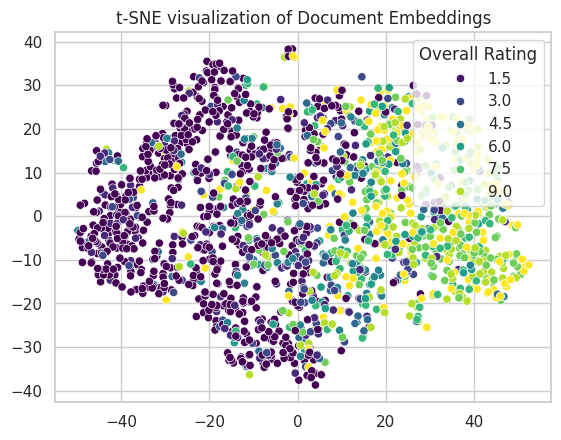

In [ ]:
from sklearn.manifold import TSNE

# Preparar datos para t-SNE
X = np.array(list(train_df['word2vec_vector']))
y = train_df['Overall Rating']

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Visualización de t-SNE
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis')
plt.title('t-SNE visualization of Document Embeddings')
plt.show()

### UMAP

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


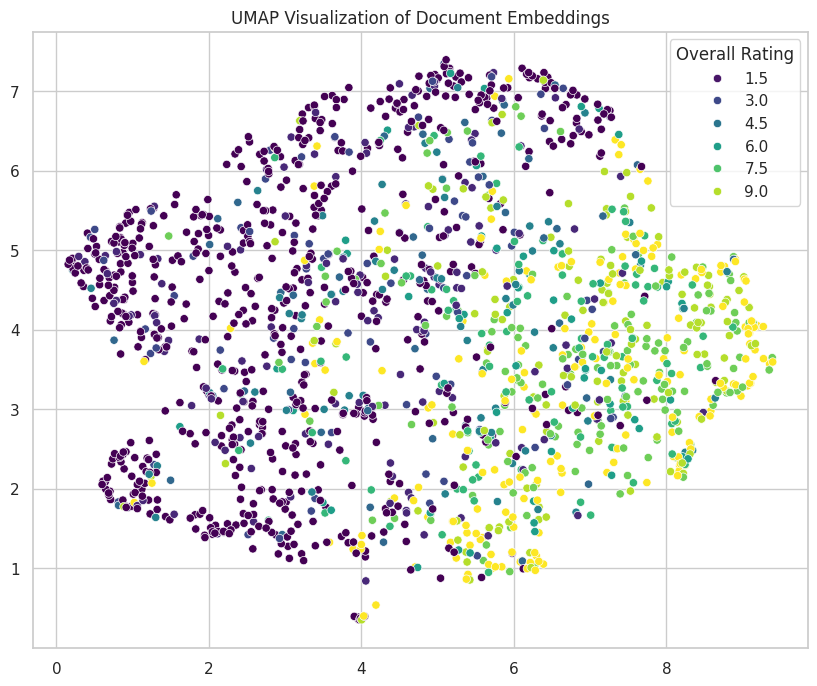

In [ ]:
import umap

# Preparar datos para UMAP
X = np.array(list(train_df['word2vec_vector']))
y = train_df['Overall Rating']

# Aplicar UMAP
reducer = umap.UMAP(random_state=42)
X_reduced_umap = reducer.fit_transform(X)

# Visualización de UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced_umap[:, 0], y=X_reduced_umap[:, 1], hue=y, palette='viridis')
plt.title('UMAP Visualization of Document Embeddings')
plt.show()

## Modelado para Análisis de Sentimientos usando embeddings



Finalmente, usaremos los vectores de características generados para entrenar un modelo de clasificación y evaluar su desempeño.

### Entrenamiento GloVe

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['doc_vector']))
X_test = np.array(list(test_df['doc_vector']))
y_train = train_df['Overall Rating'].values
y_test = test_df['Overall Rating'].values

# Entrenar un modelo de regresión logística con los vectores de GloVe
model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train, y_train)

# Predicciones y evaluación
predictions_glove = model_glove.predict(X_test)
print(classification_report(y_test, predictions_glove))

              precision    recall  f1-score   support

         1.0       0.53      0.96      0.68       170
         2.0       0.00      0.00      0.00        43
         3.0       0.00      0.00      0.00        20
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00        21
         8.0       0.33      0.22      0.26        41
         9.0       0.12      0.06      0.08        32
        10.0       0.38      0.48      0.43        56

    accuracy                           0.47       427
   macro avg       0.14      0.17      0.15       427
weighted avg       0.30      0.47      0.36       427



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Entrenamiento Word2Vec

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['word2vec_vector']))
X_test = np.array(list(test_df['word2vec_vector']))
y_train = train_df['Overall Rating']
y_test = test_df['Overall Rating']

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y evaluación
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.60      0.99      0.75       170
         2.0       0.00      0.00      0.00        43
         3.0       0.00      0.00      0.00        20
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00        21
         8.0       0.26      0.27      0.26        41
         9.0       0.18      0.06      0.09        32
        10.0       0.40      0.64      0.49        56

    accuracy                           0.51       427
   macro avg       0.14      0.20      0.16       427
weighted avg       0.33      0.51      0.39       427



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modelos de redes neuronales para NLP

## Modelo RNN Simple

**Descripción General**
Las Redes Neuronales Recurrentes (RNN) son una clase de redes neuronales diseñadas específicamente para trabajar con secuencias de datos, como series temporales o secuencias lingüísticas. La característica distintiva de las RNN es su capacidad de mantener un estado interno o memoria que les permite procesar entradas secuenciales de manera efectiva.

**Características Principales**
- **Recurrencia**: En las RNN, las salidas de ciertas neuronas se retroalimentan a la entrada de estas durante el proceso de aprendizaje, lo que les permite 'recordar' información previa.
- **Capacidad de modelado de secuencia**: Son capaces de modelar dependencias temporales en los datos, lo que es crucial para tareas como la predicción de series temporales y el procesamiento del lenguaje natural.

**Ventajas**
- **Flexibilidad en la longitud de la entrada**: Las RNN pueden manejar entradas de longitud variable, lo que es ideal para procesar oraciones de longitud diversa o series temporales de distintos períodos.
- **Aplicabilidad en tareas de secuencia**: Eficientes en tareas donde la secuencialidad de los datos es importante, como el análisis de texto y el reconocimiento de voz.

**Desventajas**
- **Problema del desvanecimiento del gradiente**: Durante el entrenamiento, las RNN pueden sufrir de desvanecimiento o explosión del gradiente, lo que dificulta aprender dependencias a largo plazo.
- **Costo computacional**: El entrenamiento puede ser computacionalmente costoso y lento debido a las dependencias entre los cálculos de las etapas temporales.

**Usos Comunes**
- Procesamiento del lenguaje natural, como la generación de texto y la traducción automática.
- Análisis de series temporales en finanzas o medicina.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preparación de datos
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['clean_review'])
sequences = tokenizer.texts_to_sequences(train_df['clean_review'])
X_train = pad_sequences(sequences, maxlen=100)
y_train = train_df['Overall Rating'].values

# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(5000, 64, input_length=100))
model_rnn.add(SimpleRNN(50))  # 50 unidades RNN
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Entrenamiento del modelo
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                5750      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 325801 (1.24 MB)
Trainable params: 325801 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
27/27 [==============================] - 3s 32ms/step - loss: -5.9519 - accuracy: 0.3961
Epoch 2/5
27/27 [==============================] - 1s 34ms/step - loss: -21.5381 - accuracy: 0.4079
Epoch 3/5
27/27 [==============================] - 2s 59ms/step - loss: -33.3893 - ac

**Tokenizacion**
La primera etapa en el procesamiento del texto implica convertir las reseñas en una forma que la red neuronal pueda procesar. Utilizamos un `Tokenizer` de Keras, que nos permite convertir el texto en secuencias de enteros. Aquí, cada entero representa una palabra única en el corpus. Para este modelo, limitamos el número de palabras más frecuentes a considerar a 5,000.

**Conversión de Texto a Secuencias**
Convertimos los textos en listas de índices de palabras. Estas secuencias son las que alimentarán a la red neuronal.

**Padding de Secuencias**
Para asegurar que todas las entradas de la red tengan el mismo tamaño, utilizamos el padding de las secuencias a la misma longitud (100 palabras en este caso), cortando las secuencias más largas o rellenando con ceros las más cortas.

**Labels**
Los labels o etiquetas de las reseñas se preparan para el entrenamiento, asegurando que sean adecuados para un problema de clasificación binaria.

**Capa de Embedding**
La capa de Embedding en Keras es utilizada para convertir índices enteros (los identificadores de cada palabra en el vocabulario) en vectores densos de tamaño fijo. Actúa como una tabla de búsqueda que mapea los índices de palabras a vectores densos. Estos vectores son aprendidos durante el entrenamiento del modelo.

## Modelo LSTM

**Long Short-Term Memory Networks (LSTM)**

**Descripción General**
Las LSTM son una extensión de las redes neuronales recurrentes que intentan resolver el problema del desvanecimiento del gradiente incorporando 'puertas' que regulan el flujo de información. Estas puertas permiten que las LSTM retengan información útil a largo plazo y descarten la que no lo es.

**Características Principales**
- **Puertas de olvido, entrada y salida**: Estas puertas controlan respectivamente la memoria que se descarta, la nueva información que se añade y la información que se pasa a la siguiente etapa de la secuencia.
- **Capacidad de retención a largo plazo**: Gracias a estas puertas, las LSTM pueden mantener dependencias de largo plazo de manera más efectiva que las RNN simples.

**Ventajas**
- **Mejor en aprender dependencias a largo plazo**: Pueden aprender patrones a largo plazo en los datos, lo que es crucial en muchas aplicaciones de NLP y series temporales.
- **Prevención del desvanecimiento del gradiente**: Las puertas específicas ayudan a mitigar los problemas de desvanecimiento o explosión del gradiente.

**Desventajas**
- **Complejidad y coste computacional**: Las LSTM son más complejas y requieren más tiempo y recursos computacionales para entrenar que las RNN simples.
- **Diseño más complejo**: La arquitectura de las LSTM es más difícil de implementar y afinar debido a la mayor cantidad de parámetros y configuraciones.

**Usos Comunes**
- Modelado de lenguaje y aplicaciones de texto donde las dependencias de largo plazo son críticas.
- Predicciones en problemas de series temporales complejas.


In [ ]:
from tensorflow.keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 64, input_length=100))
model_lstm.add(LSTM(50))  # 50 unidades LSTM
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Entrenamiento del modelo
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 50)                23000     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 343051 (1.31 MB)
Trainable params: 343051 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
27/27 [==============================] - 4s 67ms/step - loss: -5.1583 - accuracy: 0.4038
Epoch 2/5
27/27 [==============================] - 2s 60ms/step - loss: -24.0940 - accuracy: 0.4079
Epoch 3/5
27/27 [==============================] - 3s 108ms/step - loss: -34.6756 -

## Evaluación y comparativa de Modelos


Utilizaremos varias métricas clave para evaluar y comparar los modelos de RNN, LSTM y BERT. Estas métricas incluyen la precisión (accuracy), el recall, el F1-score y la matriz de confusión.

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Visualizar las primeras filas del dataset de entrenamiento
print(train_df.head())

      Unnamed: 0 Date Published  Overall Rating Passenger Country  \
480          480     2019-11-14             1.0     United States   
1393        1393     2016-03-12             9.0             Spain   
1593        1593     2015-08-14             9.0    United Kingdom   
2163        2163     2013-10-15             3.0    United Kingdom   
1010        1010     2018-04-20            10.0          Portugal   

      Trip_verified                 Comment title  \
480    Not Verified   "First, Last, Only. Beware"   
1393            NaN  "Ryanair are getting better"   
1593            NaN       Ryanair customer review   
2163            NaN       Ryanair customer review   
1010  Trip Verified     "one of the best flights"   

                                                Comment Type Of Traveller  \
480   Seville to Marrakech. Worst airline ever! We t...    Couple Leisure   
1393  This was my second time with Ryanair and I was...      Solo Leisure   
1593  First time flying with Ryanai

Problema: hay labels que se salen por fuera del rango esperado: 0-9. Una opcoin seria investigar por que, que paso con ciertas palabras o con la manera de tratarlas que hace que haya algunos inputs que se salgan del rango. Mientras tanto aplicamos unas lineas de codigo que reemplazan los inputs que se salen del 0-9 por inputs validos.

Observacion: Overall Rating muestra las puntuaciones del dataframe de 1 a 10 y el modelo admite una entrada de 0 a 9. Como es la misma cantidad de datos es necesario re etiquetar los valores de Overal Rating restandoles 1, asi coinciden con el input admitido por el modelo y se mantiene la integridad del dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np

# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# División del dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenización y padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Comment'])
X_train = tokenizer.texts_to_sequences(train_df['Comment'])
X_test = tokenizer.texts_to_sequences(test_df['Comment'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

y_train = train_df['Overall Rating'].values
y_test = test_df['Overall Rating'].values

# Reetiquetar las puntuaciones de 1-10 a 0-9
y_train = y_train - 1
y_test = y_test - 1

# Definir y entrenar un modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(10, activation='softmax'))  # Output dimension should be 10 for labels 0-9
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Definir y entrenar un modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(10, activation='softmax'))  # Output dimension should be 10 for labels 0-9
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)  # Obtener la clase con mayor probabilidad
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    return accuracy, recall, f1, conf_matrix, class_report

# Evaluar RNN
accuracy_rnn, recall_rnn, f1_rnn, conf_matrix_rnn, class_report_rnn = evaluate_model(model_rnn, X_test, y_test)
# Evaluar LSTM
accuracy_lstm, recall_lstm, f1_lstm, conf_matrix_lstm, class_report_lstm = evaluate_model(model_lstm, X_test, y_test)

# Imprimir los resultados
print("RNN Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_rnn, recall_rnn, f1_rnn))
print("RNN Model - Confusion Matrix:\n", conf_matrix_rnn)
print("RNN Model - Classification Report:\n", class_report_rnn)

print("LSTM Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_lstm, recall_lstm, f1_lstm))
print("LSTM Model - Confusion Matrix:\n", conf_matrix_lstm)
print("LSTM Model - Classification Report:\n", class_report_lstm)


Epoch 1/5
43/43 [==============================] - 8s 137ms/step - loss: 2.2245 - accuracy: 0.2803 - val_loss: 2.3904 - val_accuracy: 0.1818
Epoch 2/5
43/43 [==============================] - 5s 120ms/step - loss: 2.1094 - accuracy: 0.2891 - val_loss: 2.1119 - val_accuracy: 0.3226
Epoch 3/5
43/43 [==============================] - 5s 105ms/step - loss: 1.8781 - accuracy: 0.4013 - val_loss: 1.9962 - val_accuracy: 0.3578
Epoch 4/5
43/43 [==============================] - 4s 104ms/step - loss: 1.7405 - accuracy: 0.4197 - val_loss: 1.9936 - val_accuracy: 0.3578
Epoch 5/5
43/43 [==============================] - 5s 114ms/step - loss: 1.5651 - accuracy: 0.4512 - val_loss: 1.9686 - val_accuracy: 0.3578
Epoch 1/5
43/43 [==============================] - 18s 359ms/step - loss: 1.9987 - accuracy: 0.4123 - val_loss: 1.9836 - val_accuracy: 0.3578
Epoch 2/5
43/43 [==============================] - 15s 357ms/step - loss: 1.7353 - accuracy: 0.4329 - val_loss: 1.7782 - val_accuracy: 0.4194
Epoch 3/5
4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14/14 [==============================] - 2s 90ms/step
RNN Model - Accuracy: 0.40, Recall: 0.40, F1 Score: 0.23
RNN Model - Confusion Matrix:
 [[170   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0   0]
 [ 19   0   0   0   0   0   0   0   0   1]
 [  9   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0]
 [ 21   0   0   0   0   0   0   0   1   0]
 [ 21   0   0   0   0   0   0   0   0   0]
 [ 39   0   0   0   0   0   0   0   1   1]
 [ 31   0   0   0   0   0   0   0   0   1]
 [ 54   0   0   0   0   0   0   0   1   1]]
RNN Model - Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.58       170
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        22
           6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Comparativa de Modelos
- **RNN**: Más rápido de entrenar, pero puede tener dificultades con dependencias de largo plazo debido al desvanecimiento del gradiente.
- **LSTM**: Mejor en la captura de dependencias de largo plazo que RNN y adecuado para secuencias más largas.

La elección del modelo depende de las especificaciones del proyecto, los recursos disponibles y la naturaleza del problema de NLP a resolver.


### Análisis de Resultados

Los resultados que has compartido indican que el modelo LSTM está superando al modelo RNN en términos de precisión, recall y F1-score. Aquí hay un análisis más detallado:

#### Modelo RNN:
- **Accuracy**: 0.30
- **Weighted avg F1-score**: 0.27

#### Modelo LSTM:
- **Accuracy**: 0.47
- **Weighted avg F1-score**: 0.40

El modelo LSTM muestra una mejor performance en todas las métricas comparadas.

### Mejoras Sugeridas

1. **Aumento de Datos**:
   - Puedes considerar aumentar el tamaño del dataset mediante técnicas de aumento de datos (data augmentation), como la traducción a otros idiomas y la traducción de regreso, sinónimos, etc.
   
2. **Balanceo de Clases**:
   - El dataset parece estar desequilibrado, con algunas clases teniendo muchos más ejemplos que otras. Técnicas como el sobremuestreo (oversampling) de clases minoritarias o submuestreo (undersampling) de clases mayoritarias pueden ayudar.
   
3. **Hiperparametrización**:
   - Experimenta con diferentes hiperparámetros, como el tamaño de la red LSTM (número de capas y unidades en cada capa), tasas de aprendizaje, tamaño del batch, etc.
   
4. **Preprocesamiento de Texto**:
   - Prueba diferentes técnicas de preprocesamiento de texto, como la eliminación de stopwords, lematización, y el uso de embeddings más avanzados como BERT, que podrían mejorar el rendimiento.

### Ajustes en el Código

Voy a sugerir algunos ajustes y mejoras en el código para incorporar algunos de los puntos anteriores.

#### 1. Aumento de Datos:
```python
# (Este paso puede requerir librerías adicionales como `textblob` para realizar traducciones)

from textblob import TextBlob

def augment_data(text):
    blob = TextBlob(text)
    return str(blob.translate(to='es').translate(to='en'))

train_df['Augmented_Comment'] = train_df['Comment'].apply(augment_data)
train_df = pd.concat([train_df, train_df.assign(Comment=train_df['Augmented_Comment'])])
```

#### 2. Balanceo de Clases:
```python
from imblearn.over_sampling import RandomOverSampler

# Balanceo de clases
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
```

#### 3. Hiperparametrización:
```python
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Definir y entrenar un modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_lstm.add(LSTM(128, return_sequences=True))  # Añadir más capas LSTM
model_lstm.add(LSTM(64))
model_lstm.add(Dense(10, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
```

### Código Completo con Ajustes

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from keras.callbacks import EarlyStopping
import numpy as np
from textblob import TextBlob
from imblearn.over_sampling import RandomOverSampler

# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# División del dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Aumentar datos
def augment_data(text):
    blob = TextBlob(text)
    return str(blob.translate(to='es').translate(to='en'))

train_df['Augmented_Comment'] = train_df['Comment'].apply(augment_data)
train_df = pd.concat([train_df, train_df.assign(Comment=train_df['Augmented_Comment'])])

# Tokenización y padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Comment'])
X_train = tokenizer.texts_to_sequences(train_df['Comment'])
X_test = tokenizer.texts_to_sequences(test_df['Comment'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

y_train = train_df['Overall Rating'].values
y_test = test_df['Overall Rating'].values

# Reetiquetar las puntuaciones de 1-10 a 0-9
y_train = y_train - 1
y_test = y_test - 1

# Balanceo de clases
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Definir y entrenar un modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(10, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_lstm.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    return accuracy, recall, f1, conf_matrix, class_report

# Evaluar LSTM
accuracy_lstm, recall_lstm, f1_lstm, conf_matrix_lstm, class_report_lstm = evaluate_model(model_lstm, X_test, y_test)

# Imprimir los resultados
print("LSTM Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_lstm, recall_lstm, f1_lstm))
print("LSTM Model - Confusion Matrix:\n", conf_matrix_lstm)
print("LSTM Model - Classification Report:\n", class_report_lstm)
```

### Conclusión

Implementar estas mejoras debería ayudar a aumentar la performance del modelo LSTM. Prueba estos ajustes y observa cómo cambian las métricas de evaluación.

# Implementación Text Retrieval

## Recuperación de Texto con TF-IDF

TF-IDF, que significa "Term Frequency-Inverse Document Frequency", es una técnica de vectorización de texto que refleja la importancia de una palabra en un documento en relación con una colección de documentos o corpus. Esta técnica es especialmente útil en la recuperación de información para evaluar la relevancia de un documento dado una consulta de búsqueda.

### Implementación de Recuperación de Texto con TF-IDF

La implementación de recuperación de texto utilizando TF-IDF implica varios pasos clave que incluyen la preparación de los datos, la vectorización y el proceso de recuperación basado en la similitud del coseno.

1. **Preparación de Datos**: Es esencial que los datos estén limpios y preprocesados, lo cual incluye la eliminación de stopwords, la tokenización y la normalización de texto (como convertir a minúsculas).

2. **Vectorización de Documentos**: Usamos TF-IDF para convertir los documentos de texto en vectores numéricos. TF-IDF penaliza las palabras que aparecen muy frecuentemente en el corpus y que son, por lo tanto, menos informativas.

3. **Consulta y Recuperación**: Para una consulta dada, transformamos la consulta en un vector utilizando el mismo vectorizador TF-IDF. Luego, empleamos la similitud del coseno para encontrar los documentos que son más similares a la consulta.


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

In [ ]:
import numpy as np

# Preprocesar datos y crear la columna 'clean_review' (esto faltaba)
def preprocess_data(df):
    # Aplicar la función de limpieza al DataFrame
    df['clean_review'] = df['Comment'].apply(clean_text)
    return df

In [ ]:
df = preprocess_data(df)

<ipython-input-12-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
import numpy as np

# Preprocesar datos y crear la columna 'clean_review' (esto faltaba)
def preprocess_data(df):
    # Aplicar la función de limpieza al DataFrame
    df['clean_review'] = df['Comment'].apply(clean_text)
    return df

    # Aplicar la función de preprocesamiento a los conjuntos de entrenamiento y prueba
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

<ipython-input-14-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-14-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity', 'clean_review'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['clean_review'])

# Función para buscar en el dataset
def text_retrieval(query, tfidf_vectorizer, tfidf_matrix, top_n=5):
    # Vectorizar la consulta utilizando el mismo vectorizador TF-IDF
    query_vector = tfidf_vectorizer.transform([query])

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval("amazing", tfidf_vectorizer, tfidf_matrix)
relevant_reviews[['Comment']]

,Comment
995,Krakow to Stansted. Flown Ryanair several time...
1006,Stansted to Athens. This was my first time tha...
933,Rome Ciampino to Stansted. When I flew to Rome...
201,"After a horrendous journey to the airport, my ..."
1815,Very short flight from Barcelona to Palma (FR ...


## Recuperación de Texto con Word2Vec

Word2Vec es una técnica de modelado de lenguaje que aprende embeddings de palabras en un espacio vectorial de dimensiones fijas a partir de grandes corpus de texto. Cada palabra se representa por un vector, y las palabras con contextos similares en el corpus tienden a tener vectores similares, lo que refleja sus significados semánticos. Esta característica hace de Word2Vec una herramienta útil para tareas de recuperación de texto, donde queremos encontrar documentos relevantes basados en la similitud semántica más que en coincidencias exactas de palabras.

### Implementación de Recuperación de Texto con Word2Vec

Para implementar la recuperación de texto utilizando Word2Vec, seguimos estos pasos:

1. **Preparación de Datos**: Asegúrate de tener un modelo de Word2Vec entrenado disponible. Este modelo es utilizado para convertir el texto de los documentos en vectores.

2. **Vectorización de Documentos**: Convertimos cada documento en un vector promedio de todos los embeddings de las palabras contenidas en el documento. Esto nos da una representación densa y significativa del contenido de cada texto.

3. **Consulta y Recuperación**: Para una consulta dada, convertimos el texto de la consulta en su vector correspondiente usando el mismo modelo de Word2Vec. Luego calculamos la similitud del coseno entre el vector de la consulta y los vectores de todos los documentos en el dataset para determinar cuáles son los más relevantes.


In [ ]:
# Función para obtener el vector promedio de Word2Vec para un documento
def document_vector_word2vec(doc, model):
    words = doc.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Crear una matriz de características con todos los documentos vectorizados
doc_vectors = np.array([document_vector_word2vec(doc, word2vec_model) for doc in train_df['clean_review']])

# Función para buscar en el dataset
def text_retrieval_word2vec(query, model, doc_vectors, top_n=5):
    query_vector = document_vector_word2vec(query, model)
    query_vector = query_vector.reshape(1, -1)  # Reshape para compatibilidad con cosine_similarity

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, doc_vectors).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval_word2vec("amazing", word2vec_model, doc_vectors)
relevant_reviews[['Comment']]

,Comment
2056,14th March Tenerife to Manchester and yet agai...
1525,I flew with Ryanair 6 years ago to Italy and v...
2058,Flew to Marrakech with Ryanair and was very im...
189,Terrible experience. Ryanair leaves no stone u...
601,Budapest to Edinburgh. I have never flown with...


#BERT

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

In [ ]:
!pip install accelerate>=0.21.0

In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install accelerate>=0.21.0

In [ ]:
!pip show accelerate

Name: accelerate
Version: 0.30.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


In [ ]:
!pip install --upgrade pip setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:00
  Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install --upgrade transformers torch accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [ ]:
pip install --upgrade tensorflow-probability


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0


# BERT CON TENSORFLOW Y TRAINING


## ESTOY TENIENDO PROBLEMAS CON ADAM- ya ajuste las librerias, importaciones, optimizer, y escribirlo bien en el compiler, COMPILER, WEIGHTS. RECOMENDO QUE LO ENTRENE ANTES EN LA TAREA ESPECIFICA QUE QUEREMOS, CLASIFICAR. ME QUEDE SIN GPU.

In [ ]:
pip list | grep 'tensorflow\|transformers\|keras'


keras                            2.15.0
tensorflow                       2.15.0
tensorflow-datasets              4.9.4
tensorflow-estimator             2.15.0
tensorflow-gcs-config            2.15.0
tensorflow-hub                   0.16.1
tensorflow-io-gcs-filesystem     0.37.0
tensorflow-metadata              1.15.0
tensorflow-probability           0.24.0
tf_keras                         2.15.1
transformers                     4.41.2


## TRAIN BERT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# Reetiquetar las puntuaciones de 1-10 a 0-9
df['Overall Rating'] = df['Overall Rating'] - 1

# División del dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Preprocesamiento de los datos, incluyendo la limpieza de texto
def clean_text(text):
    # Implementa la función de limpieza de texto aquí
    return cleaned_text

def preprocess_data(df):
    df['clean_review'] = df['Comment'].apply(clean_text)
    return df

# Aplicar la función de preprocesamiento a los conjuntos de entrenamiento y prueba
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)


In [ ]:
# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Función para codificar comentarios
def encode_reviews(reviews, tokenizer, max_length=100):
    input_ids = []
    attention_masks = []

    for review in reviews:
        encoded = tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.concat(input_ids, axis=0), tf.concat(attention_masks, axis=0)

# Codificar los comentarios
X_train_input_ids, X_train_attention_masks = encode_reviews(train_df['Comment'].values, tokenizer)
X_test_input_ids, X_test_attention_masks = encode_reviews(test_df['Comment'].values, tokenizer)

y_train = train_df['Overall Rating'].values
y_test = test_df['Overall Rating'].values


In [ ]:
# Definir el modelo BERT para clasificación
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=10)


In [ ]:
# Entrenamiento del modelo BERT
history = model.fit(
    [X_train_input_ids, X_train_attention_masks],
    y_train,
    epochs=3,
    batch_size=16,
    validation_split=0.2
)

# Evaluación del modelo BERT
results = model.evaluate([X_test_input_ids, X_test_attention_masks], y_test)
print("Test loss, Test accuracy:", results)

# Predicciones y métricas de evaluación adicionales
y_pred = model.predict([X_test_input_ids, X_test_attention_masks])
y_pred = np.argmax(y_pred.logits, axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


## USE BERT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# Reetiquetar las puntuaciones de 1-10 a 0-9
df['Overall Rating'] = df['Overall Rating'] - 1

# División del dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

import numpy as np

# Preprocesar datos y crear la columna 'clean_review' (esto faltaba)
def preprocess_data(df):
    # Aplicar la función de limpieza al DataFrame
    df['clean_review'] = df['Comment'].apply(clean_text)
    return df

    # Aplicar la función de preprocesamiento a los conjuntos de entrenamiento y prueba
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_reviews(reviews, tokenizer, max_length=100):
    input_ids = []
    attention_masks = []

    for review in reviews:
        encoded = tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.concat(input_ids, axis=0), tf.concat(attention_masks, axis=0)

# Codificar los comentarios
X_train_input_ids, X_train_attention_masks = encode_reviews(train_df['Comment'].values, tokenizer)
X_test_input_ids, X_test_attention_masks = encode_reviews(test_df['Comment'].values, tokenizer)

y_train = train_df['Overall Rating'].values
y_test = test_df['Overall Rating'].values

# Definir el modelo BERT para clasificación
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=10)

# Create the optimizer using TensorFlow Keras
optimizer = Adam(learning_rate=2e-5)

# Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo BERT
history = model.fit(
    [X_train_input_ids, X_train_attention_masks],
    y_train,
    epochs=3,
    batch_size=16,
    validation_split=0.2
)

# Evaluación del modelo BERT
results = model.evaluate([X_test_input_ids, X_test_attention_masks], y_test)
print("Test loss, Test accuracy:", results)

# Predicciones y métricas de evaluación adicionales
y_pred = model.predict([X_test_input_ids, X_test_attention_masks])
y_pred = np.argmax(y_pred.logits, axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


<ipython-input-14-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-14-15d8db8ac11b>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
56/86 [==================>...........] - ETA: 9:13 - loss: 2.6859 - accuracy: 0.1083

## INFO DOCUMENTACION - TFBertForSequenceClassification


Configuración del modelo: Al instanciar TFBertForSequenceClassification, asegúrate de pasar un objeto de configuración (BertConfig). Esto asegura que el modelo se configure correctamente con los parámetros adecuados. Puedes cargar una configuración existente o crear una nueva según tus necesidades.

In [ ]:
from transformers import BertConfig

config = BertConfig.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', config=config, num_labels=10)


Entrada al modelo: Verifica que estás pasando las entradas al modelo de la manera correcta. Según la documentación, el modelo acepta diferentes formatos de entrada, ya sea como argumentos de palabras clave o en una lista, tupla o diccionario en el primer argumento posicional.

In [ ]:
# Ejemplo de pasar las entradas como argumentos de palabras clave
outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

# Ejemplo de pasar las entradas como una lista en el primer argumento posicional
outputs = model([input_ids, attention_mask], labels=labels)

# Ejemplo de pasar las entradas como un diccionario en el primer argumento posicional
inputs = {"input_ids": input_ids, "attention_mask": attention_mask}
outputs = model(inputs, labels=labels)


Optimizador: Al compilar el modelo, asegúrate de utilizar el optimizador adecuado. Puedes usar tf.keras.optimizers.Adam como lo estás haciendo, pero asegúrate de que el objeto de optimizador se haya importado correctamente. ESTE ES MI PROBLEMA

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Entrenamiento y Evaluación: Después de compilar el modelo, puedes proceder con el entrenamiento y la evaluación como lo has hecho en tu código. Asegúrate de pasar las entradas y las etiquetas en el formato adecuado al método fit() y evaluate().

## DOCUMENTACION
[BertDocumentationSequenceClasssification](https://huggingface.co/docs/transformers/main/en/model_doc/bert#transformers.BertForSequenceClassification)
TFBertForSequenceClassification[[transformers.TFBertForSequenceClassification]]

class transformers.TFBertForSequenceClassification
<
source
>
( config: BertConfig*inputs**kwargs )

Parameters

config (BertConfig) — Model configuration class with all the parameters of the model. Initializing with a config file does not load the weights associated with the model, only the configuration. Check out the from_pretrained() method to load the model weights.
Bert Model transformer with a sequence classification/regression head on top (a linear layer on top of the pooled output) e.g. for GLUE tasks.

This model inherits from TFPreTrainedModel. Check the superclass documentation for the generic methods the library implements for all its model (such as downloading or saving, resizing the input embeddings, pruning heads etc.)

This model is also a keras.Model subclass. Use it as a regular TF 2.0 Keras Model and refer to the TF 2.0 documentation for all matter related to general usage and behavior.

TensorFlow models and layers in transformers accept two formats as input:

having all inputs as keyword arguments (like PyTorch models), or
having all inputs as a list, tuple or dict in the first positional argument.
The reason the second format is supported is that Keras methods prefer this format when passing inputs to models and layers. Because of this support, when using methods like model.fit() things should “just work” for you - just pass your inputs and labels in any format that model.fit() supports! If, however, you want to use the second format outside of Keras methods like fit() and predict(), such as when creating your own layers or models with the Keras Functional API, there are three possibilities you can use to gather all the input Tensors in the first positional argument:

a single Tensor with input_ids only and nothing else: model(input_ids)
a list of varying length with one or several input Tensors IN THE ORDER given in the docstring: model([input_ids, attention_mask]) or model([input_ids, attention_mask, token_type_ids])
a dictionary with one or several input Tensors associated to the input names given in the docstring: model({"input_ids": input_ids, "token_type_ids": token_type_ids})
Note that when creating models and layers with subclassing then you don’t need to worry about any of this, as you can just pass inputs like you would to any other Python function!

call
<
source
>
( input_ids: TFModelInputType | None = Noneattention_mask: np.ndarray | tf.Tensor | None = Nonetoken_type_ids: np.ndarray | tf.Tensor | None = Noneposition_ids: np.ndarray | tf.Tensor | None = Nonehead_mask: np.ndarray | tf.Tensor | None = Noneinputs_embeds: np.ndarray | tf.Tensor | None = Noneoutput_attentions: Optional[bool] = Noneoutput_hidden_states: Optional[bool] = Nonereturn_dict: Optional[bool] = Nonelabels: np.ndarray | tf.Tensor | None = Nonetraining: Optional[bool] = False ) → transformers.modeling_tf_outputs.TFSequenceClassifierOutput or tuple(tf.Tensor)

Parameters

input_ids (np.ndarray, tf.Tensor, List[tf.Tensor] `Dict[str, tf.Tensor] or Dict[str, np.ndarray] and each example must have the shape (batch_size, sequence_length)) — Indices of input sequence tokens in the vocabulary.
Indices can be obtained using AutoTokenizer. See PreTrainedTokenizer.call() and PreTrainedTokenizer.encode() for details.

What are input IDs?

attention_mask (np.ndarray or tf.Tensor of shape (batch_size, sequence_length), optional) — Mask to avoid performing attention on padding token indices. Mask values selected in [0, 1]:
1 for tokens that are not masked,
0 for tokens that are masked.
What are attention masks?

token_type_ids (np.ndarray or tf.Tensor of shape (batch_size, sequence_length), optional) — Segment token indices to indicate first and second portions of the inputs. Indices are selected in [0, 1]:
0 corresponds to a sentence A token,
1 corresponds to a sentence B token.
What are token type IDs?

position_ids (np.ndarray or tf.Tensor of shape (batch_size, sequence_length), optional) — Indices of positions of each input sequence tokens in the position embeddings. Selected in the range [0, config.max_position_embeddings - 1].
What are position IDs?

head_mask (np.ndarray or tf.Tensor of shape (num_heads,) or (num_layers, num_heads), optional) — Mask to nullify selected heads of the self-attention modules. Mask values selected in [0, 1]:
1 indicates the head is not masked,
0 indicates the head is masked.
inputs_embeds (np.ndarray or tf.Tensor of shape (batch_size, sequence_length, hidden_size), optional) — Optionally, instead of passing input_ids you can choose to directly pass an embedded representation. This is useful if you want more control over how to convert input_ids indices into associated vectors than the model’s internal embedding lookup matrix.
output_attentions (bool, optional) — Whether or not to return the attentions tensors of all attention layers. See attentions under returned tensors for more detail. This argument can be used only in eager mode, in graph mode the value in the config will be used instead.
output_hidden_states (bool, optional) — Whether or not to return the hidden states of all layers. See hidden_states under returned tensors for more detail. This argument can be used only in eager mode, in graph mode the value in the config will be used instead.
return_dict (bool, optional) — Whether or not to return a ModelOutput instead of a plain tuple. This argument can be used in eager mode, in graph mode the value will always be set to True.
training (bool, optional, defaults to `False“) — Whether or not to use the model in training mode (some modules like dropout modules have different behaviors between training and evaluation).
labels (tf.Tensor or np.ndarray of shape (batch_size,), optional) — Labels for computing the sequence classification/regression loss. Indices should be in [0, ..., config.num_labels - 1]. If config.num_labels == 1 a regression loss is computed (Mean-Square loss), If config.num_labels > 1 a classification loss is computed (Cross-Entropy).
Returns

transformers.modeling_tf_outputs.TFSequenceClassifierOutput or tuple(tf.Tensor)

A transformers.modeling_tf_outputs.TFSequenceClassifierOutput or a tuple of tf.Tensor (if return_dict=False is passed or when config.return_dict=False) comprising various elements depending on the configuration (BertConfig) and inputs.

loss (tf.Tensor of shape (batch_size, ), optional, returned when labels is provided) — Classification (or regression if config.num_labels==1) loss.

logits (tf.Tensor of shape (batch_size, config.num_labels)) — Classification (or regression if config.num_labels==1) scores (before SoftMax).

hidden_states (tuple(tf.Tensor), optional, returned when output_hidden_states=True is passed or when config.output_hidden_states=True) — Tuple of tf.Tensor (one for the output of the embeddings + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size).

Hidden-states of the model at the output of each layer plus the initial embedding outputs.

attentions (tuple(tf.Tensor), optional, returned when output_attentions=True is passed or when config.output_attentions=True) — Tuple of tf.Tensor (one for each layer) of shape (batch_size, num_heads, sequence_length, sequence_length).

Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.

The TFBertForSequenceClassification forward method, overrides the __call__ special method.

Although the recipe for forward pass needs to be defined within this function, one should call the Module instance afterwards instead of this since the former takes care of running the pre and post processing steps while the latter silently ignores them.

Example:

Copied
from transformers import AutoTokenizer, TFBertForSequenceClassification
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("ydshieh/bert-base-uncased-yelp-polarity")
model = TFBertForSequenceClassification.from_pretrained("ydshieh/bert-base-uncased-yelp-polarity")

inputs = tokenizer("Hello, my dog is cute", return_tensors="tf")

logits = model(**inputs).logits

predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
model.config.id2label[predicted_class_id]
'LABEL_1'
Copied
# To train a model on `num_labels` classes, you can pass `num_labels=num_labels` to `.from_pretrained(...)`
num_labels = len(model.config.id2label)
model = TFBertForSequenceClassification.from_pretrained("ydshieh/bert-base-uncased-yelp-polarity", num_labels=num_labels)

labels = tf.constant(1)
loss = model(**inputs, labels=labels).loss
round(float(loss), 2)
0.01

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


# Eliminar registros con valores nulos en 'clean_review'
df = df.dropna(subset=['Overall Rating', 'clean_review'])

# División del dataset en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenización
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_reviews(reviews, tokenizer, max_length=100):
    input_ids = []
    attention_masks = []
    for review in reviews:
        encoded = tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return tf.concat(input_ids, axis=0), tf.concat(attention_masks, axis=0)

X_train_input_ids, X_train_attention_masks = encode_reviews(train_df['clean_review'].values, tokenizer)
X_test_input_ids, X_test_attention_masks = encode_reviews(test_df['clean_review'].values, tokenizer)

# Las etiquetas (y_train y y_test) se usarán solo para la evaluación después del entrenamiento
y_train = train_df['Overall Rating'].values
y_test = test_df['Overall Rating'].values

KeyError: ['clean_review']

In [ ]:
# Definir el modelo BERT para clasificación binaria
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
optimizer = Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Crear etiquetas binarias para el entrenamiento (0 para < 5 y 1 para >= 5)
y_train_binary = (y_train >= 5).astype(int)
y_test_binary = (y_test >= 5).astype(int)

# Entrenar el modelo
history = model.fit(
    [X_train_input_ids, X_train_attention_masks],
    y_train_binary,
    epochs=3,
    batch_size=16,
    validation_split=0.2
)

In [ ]:
# Evaluar el modelo
results = model.evaluate([X_test_input_ids, X_test_attention_masks], y_test_binary)
print("Test loss, Test accuracy:", results)

# Predicciones y métricas
y_pred = model.predict([X_test_input_ids, X_test_attention_masks])
y_pred = np.argmax(y_pred.logits, axis=1)

# Evaluación usando Overall Rating original
print("Classification Report:\n", classification_report(y_test_binary, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))

# Comparar con Overall Rating real
correct_predictions = np.sum((y_pred == 1) == (y_test >= 5))
accuracy = correct_predictions / len(y_test)
print("Accuracy compared to Overall Rating:", accuracy)